## 월마트 주간 매출액 데이터 분석

#### <center>라이브러리 불러오기</center>

In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
from matplotlib import dates
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

#### <center>데이터 불러오기</center>

In [3]:
df = pd.read_csv('train.csv',encoding='euc-kr')

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         282451 non-null  int64  
 1   Dept          282451 non-null  int64  
 2   Date          282451 non-null  object 
 3   Weekly_Sales  282451 non-null  float64
 4   IsHoliday     282451 non-null  bool   
 5   Temperature   282451 non-null  float64
 6   Fuel_Price    282451 non-null  float64
 7   MarkDown1     100520 non-null  float64
 8   MarkDown2     74232 non-null   float64
 9   MarkDown3     91521 non-null   float64
 10  MarkDown4     90031 non-null   float64
 11  MarkDown5     101029 non-null  float64
 12  CPI           282451 non-null  float64
 13  Unemployment  282451 non-null  float64
 14  Type          282451 non-null  object 
 15  Size          282451 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 32.6+ MB


#### <center>데이터 설명</center>

|NAME|DESCRIPTION|
|---|---|
|Store|가게 고유 번호|
|Dept|부서(department) 고유 번호|
|Weekly_Sales|주어진 부서의 해당 주간 매출액|
|Date|날짜|
|Temperature|지역의 평균 온도|
|Fuel_Price|지역의 연료 가격|
|CPI|소비자 물가 지수|
|Unemployment|실업률|
|IsHoliday|그 주가 특별한 휴일(연휴)가 있는 주 인지에 대한 참/거짓값, 모든 연휴가 데이터셋에 포함되어 있지 않으며, 다음 4개의 휴일의 경우 포함되어 있음 (아래 예시)|
||Super Bowl: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012|
||Labor Day: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012|
||Thanksgiving: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012|
||Christmas: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012||
|Type|점포 유|
|MarkDown1-5|월마트가 운영하고 있는 판촉료(?) 인하와 관련된 익명의 데이터. 2011년 11월 이후에만 사용할 수 있으며, 모든 점포에서 항상 가능한 것은 아님. 결측값은 NA로 표시됨|

### <center>데이터 전처리</center>

### 결측값 확인

In [6]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

#### 결측치 0으로 대체 

In [7]:
df = df.fillna(0)

1) 날짜(Date)를 object -> datetime으로 변환
2) 년/월/일/주 분리
3) Type, IsHoliday,Store,Dept를 카테고리형으로 변환
4) 화씨온도를 섭씨온도로 변환

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Day'] =df['Date'].dt.day
df['Week'] =df['Date'].dt.week

C:\Users\User\AppData\Local\Temp/ipykernel_16996/3934241274.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] =df['Date'].dt.week


In [9]:
df['Type'] = df['Type'].astype('category')
df['IsHoliday'] = df['IsHoliday'].astype('category')
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('category')
df['Temperature'] = (df['Temperature'] - 32) * 5/9

In [10]:
# 범주형 타입을 숫자로 인코딩
ordinal_ecd = OrdinalEncoder(dtype='int64')

encoded = ordinal_ecd.fit_transform(df['Type'].to_numpy().reshape(-1,1))
df.loc[:,'Type'] = encoded
df['Type']

0         0
1         0
2         1
3         0
4         0
         ..
282446    0
282447    0
282448    0
282449    1
282450    0
Name: Type, Length: 282451, dtype: int64

In [11]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,26,92,2011-08-26,87235.57,False,16.166667,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,0,152513,2011,8,26,34
1,34,22,2011-03-25,5945.97,False,11.727778,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,0,158114,2011,3,25,12
2,21,28,2010-12-03,1219.89,False,10.238889,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,1,140167,2010,12,3,48
3,8,9,2010-09-17,11972.71,False,24.066667,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,0,155078,2010,9,17,37
4,19,55,2012-05-18,8271.82,False,14.894444,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,0,203819,2012,5,18,20


변수별 상관계수

In [12]:
df.corr()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
Weekly_Sales,1.000000,-0.001079,0.002720,0.050051,0.020453,0.036359,0.038314,0.050670,-0.022459,-0.025850,-0.182275,0.243935,-0.008247,0.028490,-0.007012,0.027710
Temperature,-0.001079,1.000000,0.141401,-0.026460,-0.178706,-0.056531,-0.050624,-0.014987,0.181118,0.097465,0.043012,-0.058363,0.063059,0.236482,0.026389,0.236741
Fuel_Price,0.002720,0.141401,1.000000,0.298873,0.029512,0.019115,0.167834,0.213313,-0.163551,-0.033130,0.029567,0.004519,0.779979,-0.042392,0.026048,-0.032836
MarkDown1,0.050051,-0.026460,0.298873,1.000000,0.174053,-0.013804,0.838509,0.410635,0.011540,-0.106475,-0.127522,0.171187,0.502802,-0.089433,-0.126963,-0.093861
MarkDown2,0.020453,-0.178706,0.029512,0.174053,1.000000,-0.005885,0.113722,0.128500,-0.003351,-0.041081,-0.055558,0.078149,0.130884,-0.017833,0.053286,-0.011192
MarkDown3,0.036359,-0.056531,0.019115,-0.013804,-0.005885,1.000000,-0.011700,0.042033,-0.007404,-0.017348,-0.023495,0.032875,0.006983,0.114937,0.071298,0.121175
MarkDown4,0.038314,-0.050624,0.167834,0.838509,0.113722,-0.011700,1.000000,0.299324,-0.001196,-0.078282,-0.090970,0.128725,0.336277,-0.105347,-0.152741,-0.113951
MarkDown5,0.050670,-0.014987,0.213313,0.410635,0.128500,0.042033,0.299324,1.000000,0.067156,-0.119255,-0.128733,0.151692,0.399122,0.055295,-0.056355,0.055178
CPI,-0.022459,0.181118,-0.163551,0.011540,-0.003351,-0.007404,-0.001196,0.067156,1.000000,-0.302677,-0.065457,-0.005309,0.076018,0.004206,0.003399,0.005342
Unemployment,-0.025850,0.097465,-0.033130,-0.106475,-0.041081,-0.017348,-0.078282,-0.119255,-0.302677,1.000000,0.149021,-0.067772,-0.237130,-0.011329,-0.003235,-0.014334


시계열 

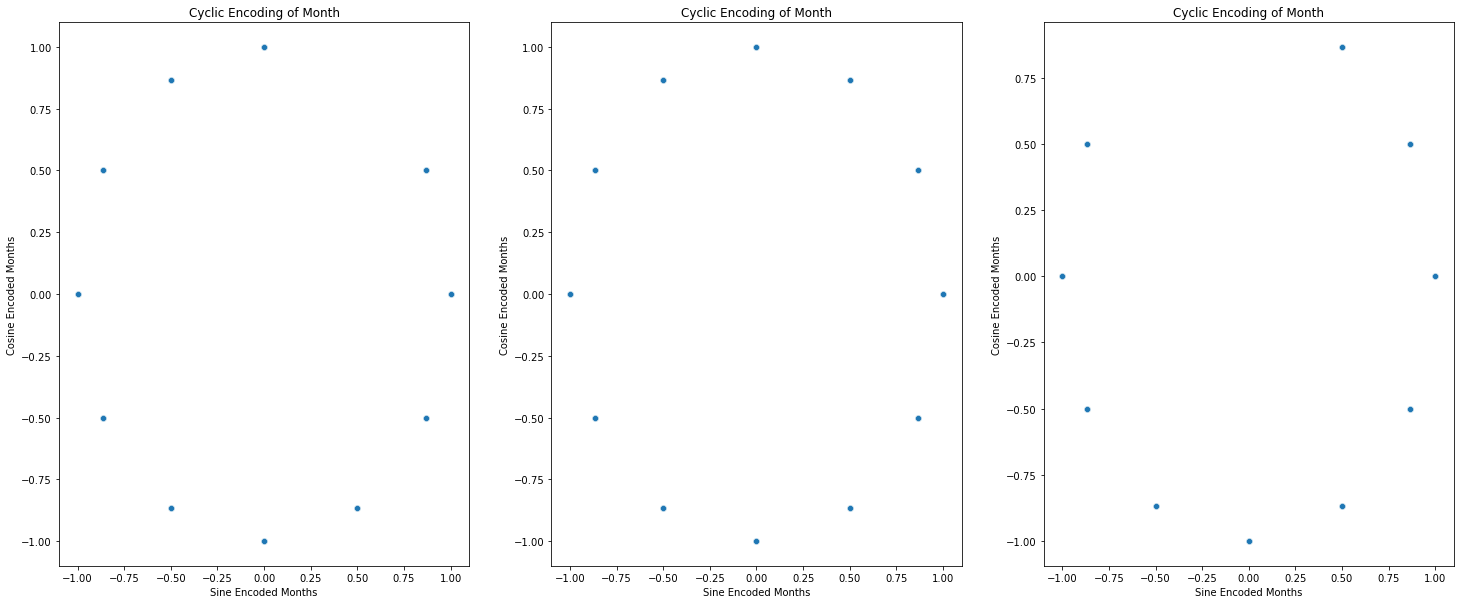

In [13]:
def encode_sin_cos(df,col_n,max_val):
    df[col_n+'_sin'] = np.sin(2*np.pi*df[col_n]/max_val)
    df[col_n+'_cos'] = np.cos(2*np.pi*df[col_n]/max_val)
    
    return df

data_sin_cos = encode_sin_cos(df.copy(),'Month',12)
data_sin_cos = encode_sin_cos(data_sin_cos,'Day',31)
data_sin_cos

fig,axe = plt.subplots(ncols=3,figsize=(25,10))
year = [2010,2011,2012]
for y,i in zip(year,axe):
    c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=data_sin_cos[data_sin_cos['Year'] == y],ax=i)
    
    c_m.set_title("Cyclic Encoding of Month")
    c_m.set_ylabel("Cosine Encoded Months")
    c_m.set_xlabel("Sine Encoded Months")

#### 주간 판매액에 대한 변수별 상관계수

In [14]:
corr = df[['Store','Dept','Date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Year','Month','Day']].corr()

corr['Weekly_Sales'].abs().sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243935
Type            0.182275
MarkDown5       0.050670
MarkDown1       0.050051
MarkDown4       0.038314
MarkDown3       0.036359
Month           0.028490
Unemployment    0.025850
CPI             0.022459
MarkDown2       0.020453
Year            0.008247
Day             0.007012
Fuel_Price      0.002720
Temperature     0.001079
Name: Weekly_Sales, dtype: float64

##### 히트맵

C:\Users\User\AppData\Local\Temp/ipykernel_16996/3441776810.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

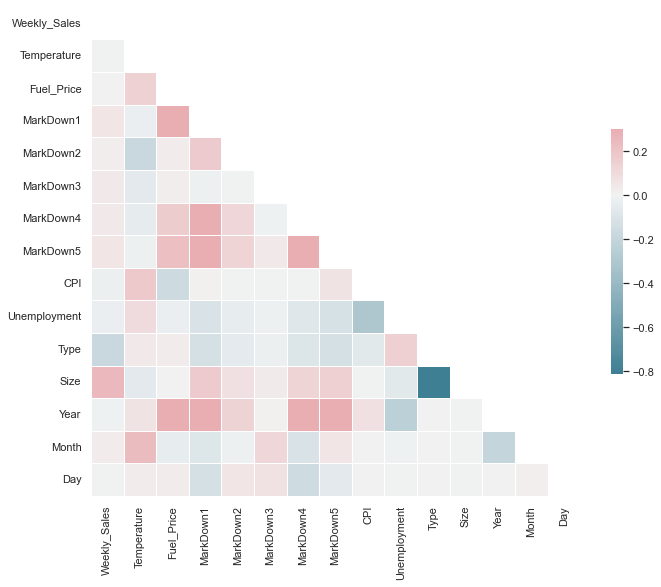

In [15]:
sns.set(style="white")

corr = df[['Store','Dept','Date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Year','Month','Day']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### Markdown과 날짜를 제외한 변수들 간의 관계 파악

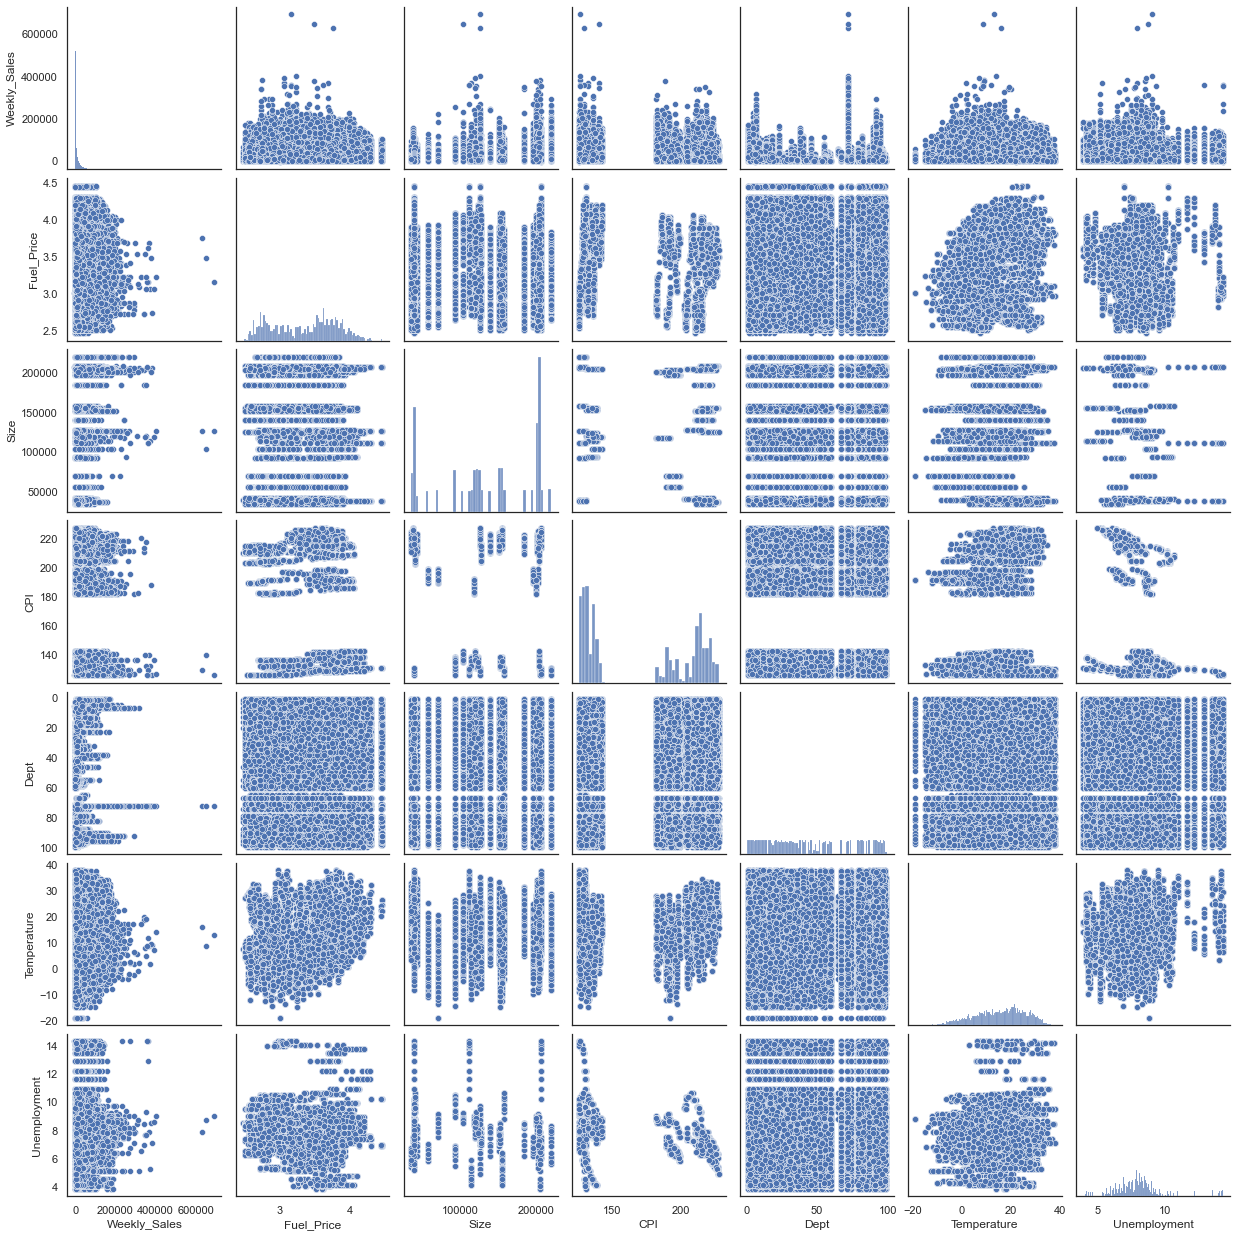

In [136]:
sns.pairplot(df, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'],)

#### Numerical Data의 데이터 분포 및 이상치 파악

['2011-02-04T00:00:00.000000000']


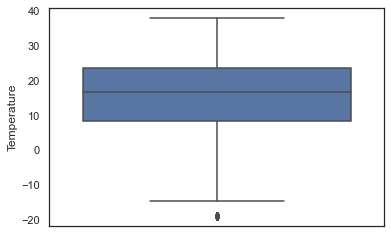

In [ ]:
sns.boxplot(y = df['Temperature'])
print(df[df['Temperature'] < -15]['Date'].unique())

<AxesSubplot:ylabel='Fuel_Price'>

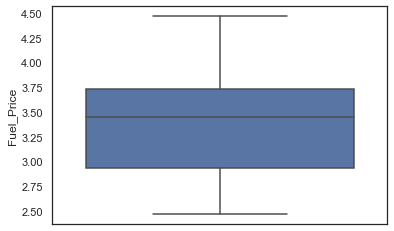

In [ ]:
sns.boxplot(y = df['Fuel_Price'])

<AxesSubplot:ylabel='Unemployment'>

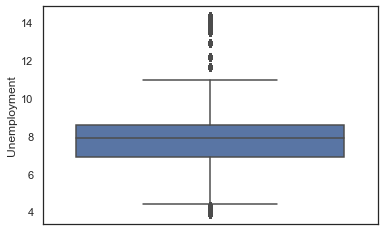

In [ ]:
sns.boxplot(y = df['Unemployment'])

In [16]:
# pandas의 cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형시킵니다.
bins = [-100000, 0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
ctg = pd.cut(df['Weekly_Sales'], bins=bins)
# 구간별로 값이 몇 개가 속해 있는지 value_counts()로 확인
ctg.value_counts().sort_index()

(-100000, 0]           900
(0, 100000]         278143
(100000, 200000]      3300
(200000, 300000]        87
(300000, 400000]        17
(400000, 500000]         1
(500000, 600000]         0
(600000, 700000]         3
Name: Weekly_Sales, dtype: int64

### 가게 사이즈별 분류(임의로 나눴는데 보다 좋은 기준이 있으면 좋을 것 같음)

In [40]:
df['Size'].unique()

array([152513, 158114, 140167, 155078, 203819, 219622, 202307, 203007,
       118221,  39910, 205863, 202505,  34875, 103681, 206302,  39690,
        57197, 151315, 204184, 119557, 155083, 120653, 128107, 126512,
       203742, 196321,  42988, 200898, 207499,  93188, 114533, 123737,
        70713,  93638,  37392, 184109, 125833, 112238, 203750,  41062],
      dtype=int64)

In [18]:


bins = [0, 50000, 100000,150000, 200000,250000]
ctg = pd.cut(df['Size'], bins=bins)
ctg.value_counts().sort_index()

(0, 50000]          49176
(50000, 100000]     25855
(100000, 150000]    71449
(150000, 200000]    47065
(200000, 250000]    88906
Name: Size, dtype: int64

In [19]:
conditionlist = [
    (df['Size'] <= 50000) ,
    (df['Size'] >= 50000) & (df['Size'] <=100000),
    (df['Size'] >= 100000) & (df['Size'] <=150000),
    (df['Size'] >= 150000) & (df['Size'] <=200000),
    (df['Size'] <= 250000)]
choicelist = ['S', 'SM', 'M','ML','L']
df['Size_category'] = np.select(conditionlist, choicelist, default='Not Specified')

In [20]:
df[['Size','Size_category']]

,Size,Size_category
0,152513,ML
1,158114,ML
2,140167,M
3,155078,ML
4,203819,L
...,...,...
282446,204184,L
282447,184109,ML
282448,200898,L
282449,123737,M


#### 매장 사이즈별 개수 확인

Text(0.5, 0, 'Size_category')

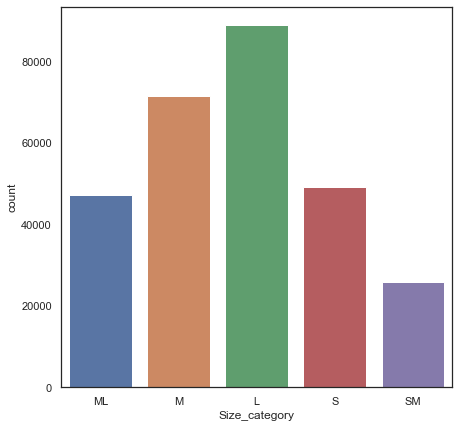

In [21]:

fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(data=df,x='Size_category',ax=ax)
ax.set_xlabel('Size_category')

In [ ]:
#매장 사이즈별 매출 평균
wksale_by_sizeS = df[df['Size_category']=='S']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeSM = df[df['Size_category']=='SM']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeM = df[df['Size_category']=='M']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeML = df[df['Size_category']=='ML']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeL = df[df['Size_category']=='L']['Weekly_Sales'].groupby(df['Week']).mean()


#### 매장 사이즈별 매출 
##### ML 사이즈의 매장이 S,M 사이즈의 매장보다 수가 적지만 매출액은 높음 => 가게가 클수록 매출액이 높다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\l

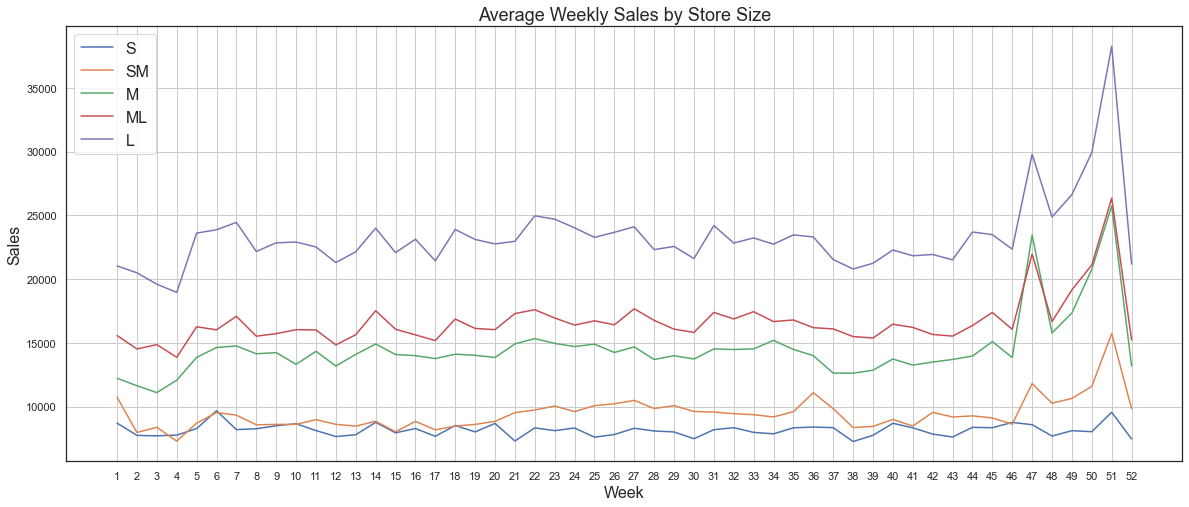

In [ ]:

plt.figure(figsize=(20,8))
sns.lineplot(wksale_by_sizeS.index,wksale_by_sizeS.values)
sns.lineplot(wksale_by_sizeSM.index,wksale_by_sizeSM.values)
sns.lineplot(wksale_by_sizeM.index,wksale_by_sizeM.values)
sns.lineplot(wksale_by_sizeML.index,wksale_by_sizeML.values)
sns.lineplot(wksale_by_sizeL.index,wksale_by_sizeL.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['S','SM','M','ML','L'], loc='best', fontsize=16)
plt.title('Average Weekly Sales by Store Size', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

#### 휴일/비휴일 수

C:\Users\User\AppData\Local\Temp/ipykernel_9892/3099304684.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


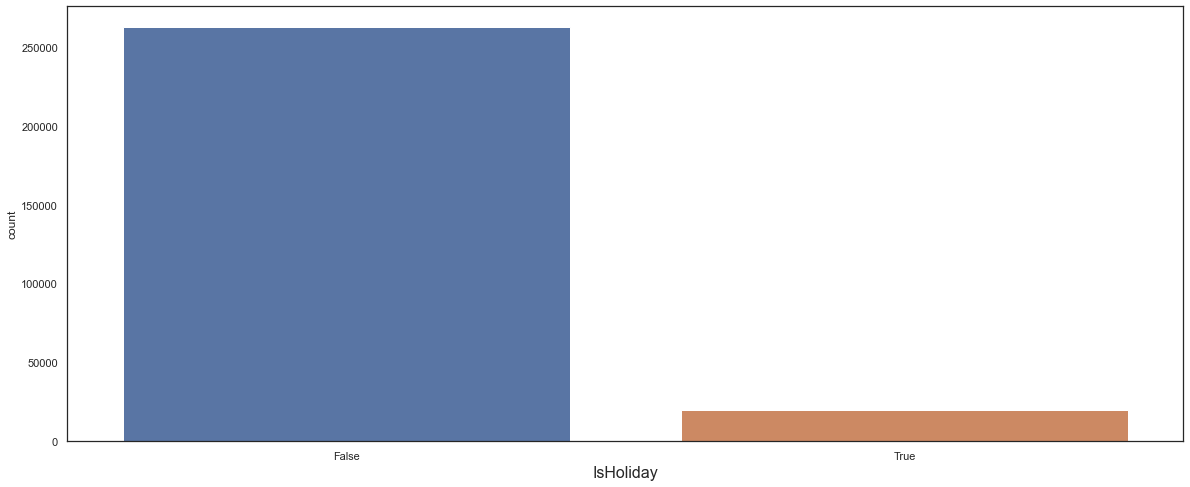

In [ ]:

fig = plt.figure(figsize=(20,8))
sns.countplot(x=df['IsHoliday'])
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

#### 휴일/비휴일 매출 분포

C:\Users\User\AppData\Local\Temp/ipykernel_7268/842634160.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


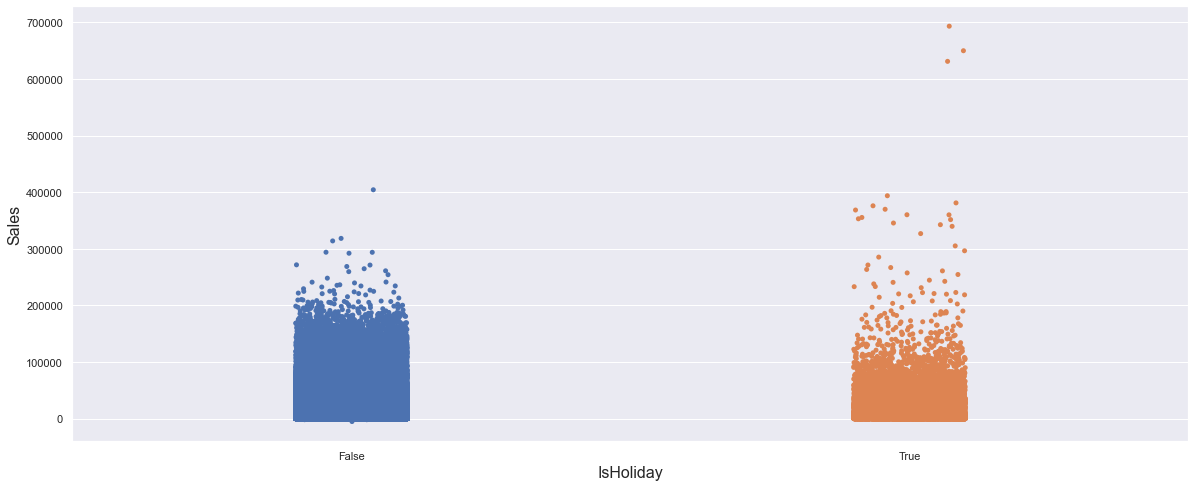

In [ ]:

fig = plt.figure(figsize=(20,8))
sns.stripplot(y=df.Weekly_Sales, x=df['IsHoliday'])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

#### 휴일/비휴일 총 매출 확인
##### 비휴일보다 휴일에 총 매출액이 더 높음

C:\Users\User\AppData\Local\Temp/ipykernel_9892/1228100660.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


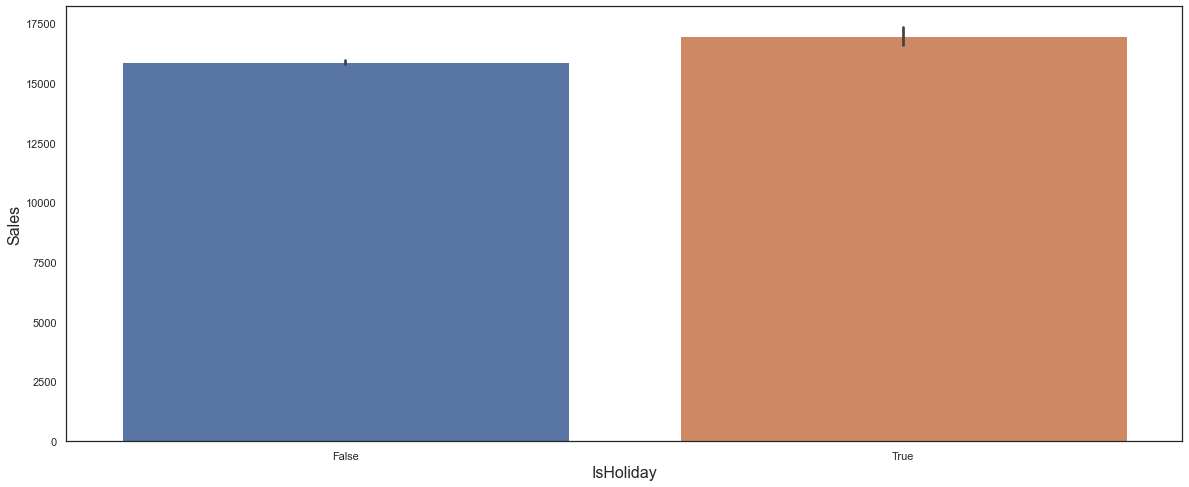

In [ ]:
#휴일/비휴일 총 매출
fig = plt.figure(figsize=(20,8))
sns.barplot(y=df.Weekly_Sales, x=df['IsHoliday'])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

### 날짜별 MarkDown 개수 확인

In [ ]:
#마크다운 not NaN이면 1, NaN이면 0

df['MD1'] = [0 if s == 0 else 1 for s in df['MarkDown1']]
df['MD2'] = [0 if s == 0 else 1 for s in df['MarkDown2']]
df['MD3'] = [0 if s == 0 else 1 for s in df['MarkDown3']] 
df['MD4'] = [0 if s == 0 else 1 for s in df['MarkDown4']] 
df['MD5'] = [0 if s == 0 else 1 for s in df['MarkDown5']]  
# df['MD1'] = df['MD1'].astype('category')
# df['MD2'] = df['MD2'].astype('category')
# df['MD3'] = df['MD3'].astype('category')
# df['MD4'] = df['MD4'].astype('category')
# df['MD5'] = df['MD5'].astype('category')


In [ ]:
col_list = ['MD1','MD2','MD3','MD4','MD5']
col_list

['MD1', 'MD2', 'MD3', 'MD4', 'MD5']

In [ ]:
df['MD_count'] = df[col_list].sum(axis=1)

In [ ]:
df['MD_count']

0         0
1         0
2         0
3         0
4         4
         ..
282446    4
282447    0
282448    0
282449    0
282450    0
Name: MD_count, Length: 282451, dtype: int64

#### 비휴일보다 휴일에 MarkDown 행사를 더 많이 한다.

C:\Users\User\AppData\Local\Temp/ipykernel_9892/1734532239.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


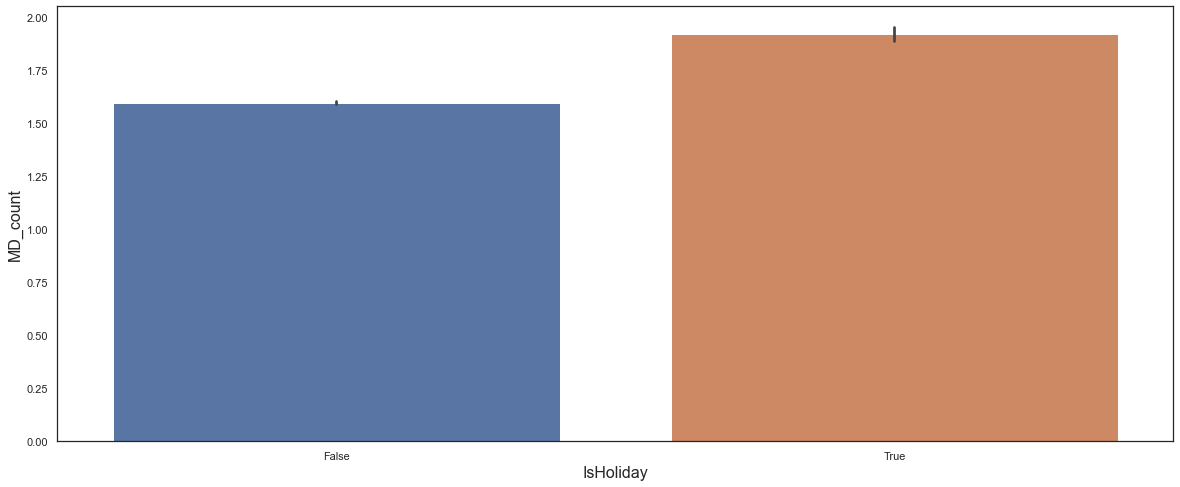

In [ ]:
fig = plt.figure(figsize=(20,8))
sns.barplot(x=df['IsHoliday'], y=df['MD_count'])
plt.ylabel('MD_count', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

##### MarkDown 행사를 할 경우 대부분 4~5개로, 전체 MarkDown에 대해 행사를 진행하는 것으로 보인다.

Text(0.5, 0, 'MD_count')

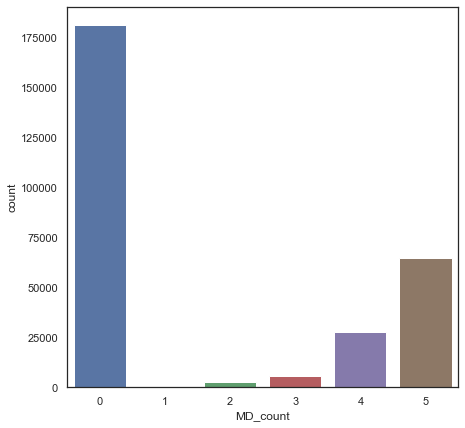

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(data=df,x='MD_count',ax=ax)
ax.set_xlabel('MD_count')

#### 유형별 매장크기
L 사이즈의 매장은 Type A에만, M 사이즈의 매장은 Type B에만 존재하고, Type C는 S 사이즈의 매장으로만 구성되어 있다.

Text(0.5, 17.200000000000003, 'MD_count')

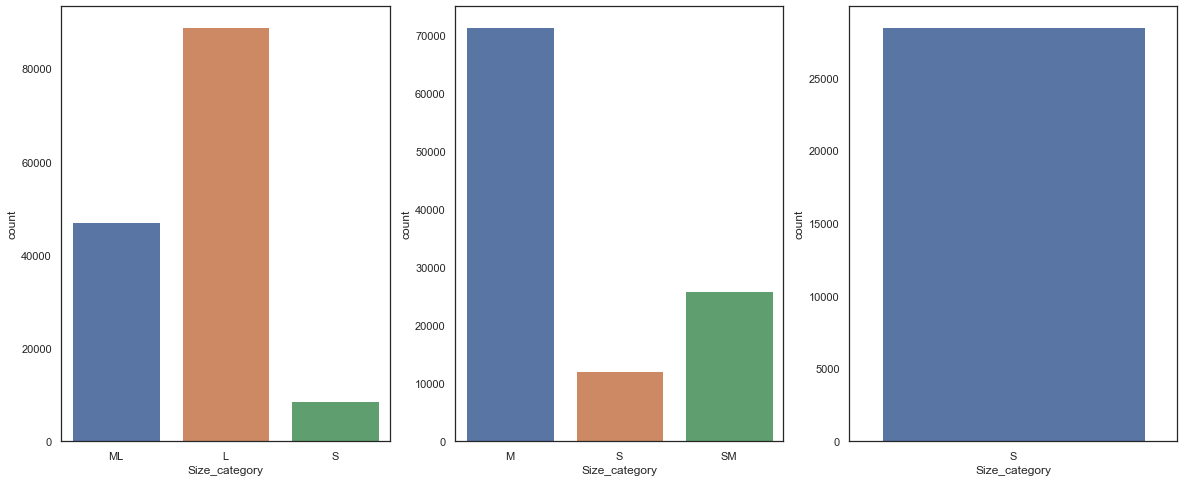

In [39]:

fig= plt.subplots(1,1,figsize=(20,8))
df['Type'] = df['Type'].astype('category')
plt.subplot(1, 3, 1)
sns.countplot(data=df[df['Type']==0],x='Size_category')
plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Type']==1],x='Size_category')
plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Type']==2],x='Size_category')
ax.set_xlabel('MD_count')